# Введение в машинное обучение

## Семинар #8

### Екатерина Кондратьева

ekaterina.kondrateva@skoltech.ru

## Отбор и генерация признаков (Feature Engineering). Поиск и оптимизация модели (Grid Search). Поиск аномалий (Anomaly Detection)

In [1]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
%matplotlib inline

## Кто такие аутлайеры (аномалии)? 

Это наблюдение, которое "**отличается**" "**настолько сильно**" от "**прочих наблюдений**"

Определение аномалий в датасете невозможно без: 
   1. определения **"прочих наблюдений"** (модели данных)
   2. определения метрики отклонения (**"отличия"**) от **"прочих наблюдений"** 
   3. определения **"насколько сильно"** аномальные объекты **"отличаются"** от **"прочих наблюдений"**

##### Назовите самый простой способ детектирования аномалий?

*Спойлер: СТД? Квантили?*

## 1.  Нахождение фрода

Источник: https://www.kaggle.com/dalpozz/creditcardfraud

In [7]:
data = pd.read_csv("./data/creditcard.csv")

Давайте проверим, сколько "фрода" в этой выборке?

In [8]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
11258,19546.0,-0.454749,-4.054983,-0.273254,-0.399568,-2.590132,-0.393092,0.138466,-0.391686,-0.873562,...,0.054097,-1.563757,-0.628145,0.457243,-0.338810,-0.653193,-0.184372,0.185015,1002.00,0
78321,57475.0,-6.423197,1.072629,-3.820238,-0.269845,-4.125205,-0.690805,-0.196968,2.840871,-0.307457,...,0.011082,0.109586,-0.041425,0.576822,-0.291755,0.837947,-0.077805,-0.788987,255.30,0
226814,144808.0,-2.405207,2.943823,-7.616654,3.533374,-5.417494,-0.112632,-1.329372,1.709417,-2.322716,...,0.652683,0.414132,0.023869,-0.260616,0.405316,0.029107,0.519807,-0.469537,667.55,1
276476,167121.0,-0.454736,0.189683,0.839674,-0.810172,0.458127,0.106038,0.427228,0.195571,-1.232442,...,-0.136466,0.090678,-0.255906,0.628284,0.175469,-0.617653,0.147898,0.142017,9.94,0
174521,121948.0,0.014204,0.516012,0.248349,-0.307436,0.180279,1.025058,-0.806851,-1.255250,0.843365,...,1.673448,0.206028,-0.294641,0.199466,0.902569,0.829324,0.220143,0.262698,7.50,0


In [ ]:
# <YOUR CODE>

Должно быть  1.7% , что можно сказать про баланс классов?

In [11]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,28924.000000,28924.000000,28924.000000,28924.000000,28924.000000,28924.000000,28924.000000,28924.000000,28924.000000,28924.000000,...,28924.000000,28924.000000,28924.000000,28924.000000,28924.000000,28924.000000,28924.000000,28924.000000,28924.000000,28924.000000
mean,94597.165641,-0.063516,0.075994,-0.116809,0.083753,-0.054695,-0.016576,-0.078323,0.015787,-0.039995,...,0.010800,-0.000310,-0.004370,-0.000643,-0.000772,0.002518,0.002694,0.001286,87.285667,0.017010
std,47526.033582,2.173112,1.697883,1.935877,1.546847,1.556783,1.348886,1.649011,1.431676,1.170255,...,0.862053,0.742108,0.565251,0.605248,0.520625,0.481248,0.434112,0.345710,235.492046,0.129311
min,0.000000,-30.552380,-40.978852,-31.103685,-5.683171,-32.092129,-17.118592,-43.557242,-41.484823,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.822684,-4.781606,-1.664130,-9.895244,-8.478686,0.000000,0.000000
25%,53988.250000,-0.940423,-0.579151,-0.962786,-0.824836,-0.703097,-0.787944,-0.569843,-0.206605,-0.658765,...,-0.228051,-0.546631,-0.160934,-0.356201,-0.316206,-0.325299,-0.070677,-0.052643,5.390000,0.000000
50%,84602.500000,0.008535,0.078486,0.152450,0.016759,-0.062998,-0.290597,0.031023,0.028303,-0.067754,...,-0.024851,0.006007,-0.011446,0.042417,0.014036,-0.049536,0.001890,0.011664,21.950000,0.000000
75%,139215.250000,1.314801,0.834686,1.007704,0.798441,0.604570,0.395795,0.557633,0.344750,0.588573,...,0.192924,0.532145,0.145472,0.440141,0.346935,0.246329,0.094998,0.079820,76.000000,0.000000
max,172786.000000,2.412720,22.057729,4.069865,12.114672,24.345310,21.393069,34.303177,20.007208,7.937988,...,27.202839,8.361985,12.045536,3.695503,3.347936,3.004455,10.135597,15.769636,7712.430000,1.000000


In [12]:
full_X = data.drop(columns="Class")
full_y = data["Class"]

Будем делать **красиво**:
    
    - отложим заранее из оригинальной выборки тестовую, размером 0.4
    - будем выбирать модель кросс валидацией на выборке `train`
    - не забудем про стратификацию

In [41]:
from sklearn.model_selection import train_test_split

full_X.reset_index(drop=True)

tt_split = train_test_split(full_X, full_y, test_size=0.4, stratify=full_y)#<YOUR CODE>

train_X, test_X, train_y, test_y = tt_split 

Будем делать **красиво**, выберем несколько метрик:
    
    1. стандартно `accuracy`, почему это плохо в нашем случае?
    2. `precision_score` или доля истинных 1 среди всех помеченных как 1
    3. `recall_score` или полнота "вероятность", с которой все истинные 1 предсказаны как 1
    4. `fbeta_score` - частный случай которого, наш знакомый `f1_score` 

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, f1_score

In [43]:
f1_score?

In [44]:
fbeta_score?

Зачем нам $\beta$ ? : https://en.wikipedia.org/wiki/F1_score

Возьмем $\beta = 1.7$ как будто, мы заранее знаем, сколько нам ожидать ффрода в выборке.

In [45]:
def show_metrics(y_true, y_pred):
    return pd.Series(
        {
        "accuracy": accuracy_score(y_true, y_pred),
        
        "precision": precision_score(y_true, y_pred),
        
        "recall": recall_score(y_true, y_pred),
        
        "f1_score": f1_score(y_true, y_pred),
        
        "f_0.2": fbeta_score(y_true, y_pred, beta=.17),
    }
)

## Обнаружение выбросов

In [46]:
from sklearn.metrics import precision_recall_curve, roc_curve

def plot_level_lines(model, data, size=100):
    def _expand(a, b, frac=.5, margin=1.):
        return a - abs(a) * frac - margin, b + abs(b) * frac + margin

    # Вспомогательная функция для рисования линий уровня и набора точек
    plt.figure(figsize=(10, 7))
    min_x, min_y = data.min(axis=0)
    max_x, max_y = data.max(axis=0)
    min_x, max_x = _expand(min_x, max_x)
    min_y, max_y = _expand(min_y, max_y)

    # создаём регулярную сетку для контуров
    all_x = np.linspace(min_x, max_x, num=size)
    all_y = np.linspace(min_y, max_y, num=size)
    XX, YY = np.meshgrid(all_x, all_y)
    test_data = np.c_[XX.ravel(), YY.ravel()]

    # опрашиваем предсказания модели
    try:
        predictions = model.decision_function(test_data).reshape(size, size)
        data_scores = model.predict(data)
        anomaly_scores = model.decision_function(data)

    except AttributeError:
        predictions = model._decision_function(test_data).reshape(size, size)
        data_scores = model._predict(data)
        anomaly_scores = model._decision_function(data)

    # создаём график контуров с заливкоц
    plt.contourf(all_x, all_y, predictions, cmap=plt.cm.coolwarm)

    # отображаем границу принятия решений
    threshold = anomaly_scores[data_scores==1.0].min()
    plt.contour(XX, YY, predictions, levels=[threshold], linewidths=2, colors='darkred')

    # нарисуем точки выборки
    plt.scatter(data[:, 0], data[:, 1])

    axes = plt.gca()
    axes.set_xlim([min_x,max_x])
    axes.set_ylim([min_y,max_y])

    plt.show()
    plt.close()

Эта процедура рисует кривые ROC и Precision-Recalls.

In [47]:
from sklearn.metrics import precision_recall_curve, roc_curve


def plot_results(y_test, probabilities):
    # построим кривые ROC и PR
    fpr, tpr, _ = roc_curve(y_test, probabilities)
    precision, recall, _ = precision_recall_curve(y_test, probabilities)

    # создаём холсты
    fig, (ax_roc, ax_pr_rec) = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(15, 5)

    # roc
    ax_roc.plot(fpr, tpr, linewidth=3)
    ax_roc.set_xlabel('FPR')
    ax_roc.set_ylabel('TPR')

    ax_roc.grid(True)
    ax_roc.xaxis.label.set_fontsize(20)
    ax_roc.yaxis.label.set_fontsize(20)

    ax_roc.fill_between(fpr, tpr, 0, alpha=0.1)

    # precision-recall
    ax_pr_rec.plot(recall, precision, linewidth=3)
    ax_pr_rec.set_xlabel('Recall')
    ax_pr_rec.set_ylabel('Precision')

    ax_pr_rec.grid(True)
    ax_pr_rec.xaxis.label.set_fontsize(20)
    ax_pr_rec.yaxis.label.set_fontsize(20)

    ax_pr_rec.fill_between(recall, precision, 0, alpha=0.1)

    plt.show()
    plt.close()

Создаём несколько скоплений точек и подмешиваем аномальных точек

In [48]:
from sklearn.datasets import make_blobs


def data_generator(n_samples=100, anomaly_fraction=0.1, n_features=2):
    n_anomaly = int(n_samples * anomaly_fraction)
    n_normal = n_samples - n_anomaly

    normal_data, _ = make_blobs(n_normal, n_features=n_features, centers=3)

    anomaly_data = np.random.rand(n_anomaly, n_features)

    nrm_min = normal_data.min(axis=0).reshape(1, -1)
    nrm_ptp = normal_data.ptp(axis=0).reshape(1, -1)
    anomaly_data = anomaly_data * nrm_ptp + nrm_min

    return np.concatenate([normal_data, anomaly_data], axis=0)

Создаём одно скопление точек, к которому подмешаны аномалии

In [49]:
def unimodal_data_generator(n_samples=100, anomaly_fraction=0.1, n_features=2):
    n_anomaly = int(n_samples * anomaly_fraction)
    n_normal = n_samples - n_anomaly

    xform = np.array([[2, 0.5], [0.5, 1.5]])
    normal_data = np.random.randn(n_normal, n_features) @ xform
    anomaly_data = np.random.rand(n_anomaly, n_features)

    nrm_min = normal_data.min(axis=0).reshape(1, -1)
    nrm_ptp = normal_data.ptp(axis=0).reshape(1, -1)
    anomaly_data = anomaly_data * nrm_ptp + nrm_min

    return np.concatenate([normal_data, anomaly_data], axis=0)

Сгенерируем данные

In [50]:
data_blob = unimodal_data_generator()

data_blobs = data_generator()

<br>

### Эллиптическая Огибающая

Метод **Elliptic Envelope** предполагает, что 
* данные порожденные
эллиптическим распределением

* аномальные точки находятся дальше от центра скопления, чем нормальные

In [51]:
from sklearn.covariance import EllipticEnvelope

Метод: https://scikit-learn.org/stable/modules/outlier_detection.html

Для одномодальных данных получается более-менее адекватно

/home/kate/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


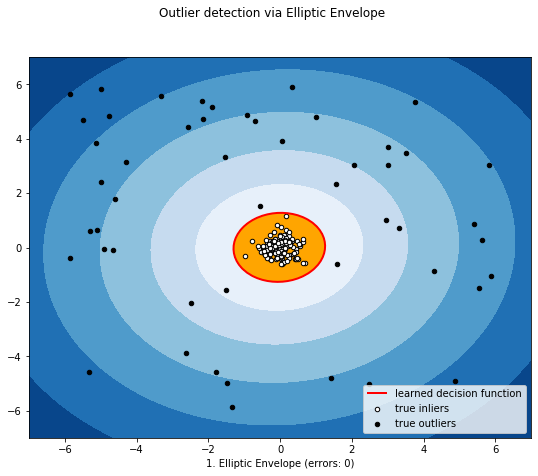

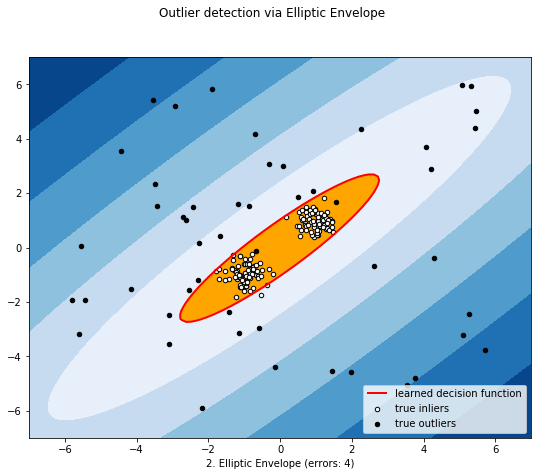

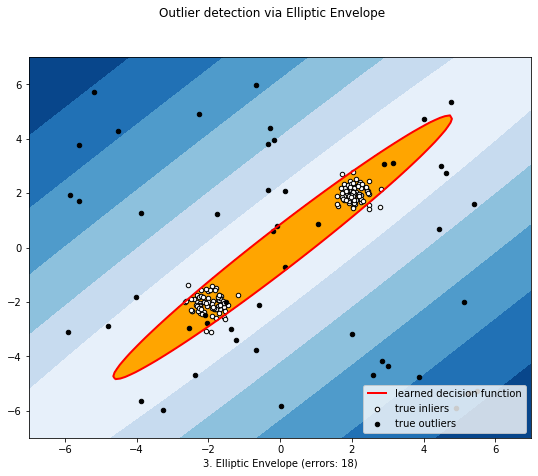

In [52]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager


from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)
rng = np.random.RandomState(42)

# Example settings
n_samples = 200
outliers_fraction = 0.25
clusters_separation = [0, 1, 2]

# Settings for evaluation
xx, yy = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.ones(n_samples, dtype=int)
ground_truth[-n_outliers:] = -1


for i, offset in enumerate(clusters_separation):
    # Data generation
    X1 = 0.3 * np.random.randn(n_inliers // 2, 2) - offset
    X2 = 0.3 * np.random.randn(n_inliers // 2, 2) + offset
    X = np.r_[X1, X2]

    # Add outliers
    X = np.r_[X, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]

    # Model
    clf = EllipticEnvelope(contamination=outliers_fraction)

    # Fit the model
    plt.figure(figsize=(9, 7))


    clf.fit(X)
    scores_pred = clf.decision_function(X)
    y_pred = clf.predict(X)
    threshold = stats.scoreatpercentile(scores_pred, 100 * outliers_fraction)
    n_errors = (y_pred != ground_truth).sum()

    # plot the levels lines and the points
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                     cmap=plt.cm.Blues_r)
    a = plt.contour(xx, yy, Z, levels=[threshold],
                        linewidths=2, colors='red')
    plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                     colors='orange')
    b = plt.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], c='white',
                        s=20, edgecolor='k')
    c = plt.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], c='black',
                        s=20, edgecolor='k')
    plt.axis('tight')
    plt.legend(
        [a.collections[0], b, c],
        ['learned decision function', 'true inliers', 'true outliers'],
        prop=matplotlib.font_manager.FontProperties(size=10),
        loc='lower right')
    plt.xlabel("%d. %s (errors: %d)" % (i + 1, 'Elliptic Envelope', n_errors))
    plt.xlim((-7, 7))
    plt.ylim((-7, 7))
    plt.suptitle("Outlier detection via Elliptic Envelope")

plt.show()

/home/kate/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


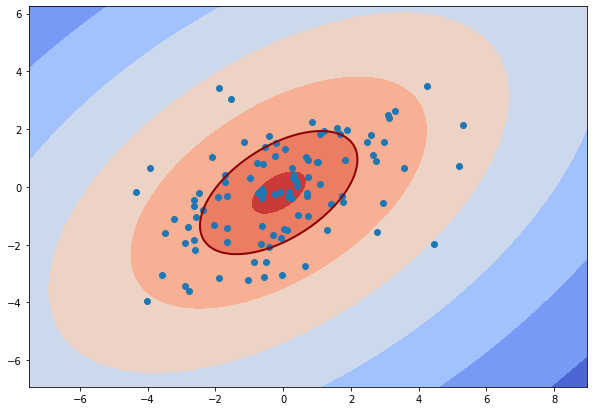

In [53]:
model = EllipticEnvelope(assume_centered=False, contamination=0.5)

model.fit(data_blob)

plot_level_lines(model, data_blob)

/home/kate/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


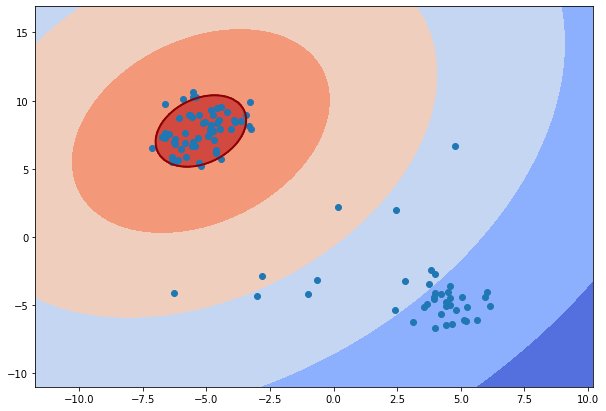

In [55]:
model = EllipticEnvelope(assume_centered=False, contamination=0.5)

model.fit(data_blobs)

plot_level_lines(model, data_blobs)

Плюсы:
* простой в использовании метод
* порождает интерпретируемую границу

Минусы:
* Годится только для **одномодальных** распределений
* Подвержен вырождению ковариационной матрицы

Посмотрим на его работу в обнаружении мошенничества

In [56]:
model = EllipticEnvelope(contamination=0.01)

model.fit(train_X)

predictions_elliptic = -model.decision_function(test_X)

labels_elliptic = model.predict(test_X)

/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-28.480325790519601 > -53.526971193329700)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-40.615490252470948 > -54.720466216369537)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-39.911140978024612 > -51.745543319597502)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-27.623162821009931 > -52.502493212508952)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning

/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-23.868594466682588 > -87.005635600220259)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-23.733673825599116 > -45.054352259943045)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-22.468690986260963 > -55.423176681753461)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-28.629487164400903 > -55.928101520019432)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning

/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-43.034028386303376 > -86.500288458361482)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-44.746950930445848 > -84.872469209099563)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-43.447481717328181 > -87.392649588503261)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-47.961351605396217 > -85.116045025920783)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning

/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-20.367209005497660 > -50.324193044280321)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-40.363422617885995 > -48.979147406473274)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-19.732651821287511 > -49.128191368374324)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-20.939456126134576 > -45.960979469075035)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning

/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-17.595963592425992 > -83.325332854311597)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-46.232218353949889 > -77.407007988014726)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-29.647666755091517 > -50.336898990803235)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-29.141567439769879 > -48.636037569062140)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning

/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-43.690901427555417 > -45.393710886675763)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-45.820516203840377 > -78.417793844676368)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-39.680740698368083 > -48.952454990058683)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-37.818642756623561 > -49.968227949954546)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning

/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-12.745134173206599 > -45.882197087742981)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-15.934081561086494 > -32.865075605520538)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-15.694696727609061 > -46.313787622826183)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-20.625547985409121 > -48.788070276896931)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning

/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-15.279887220715624 > -50.718302887642132)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-31.583264627545010 > -49.630016671474550)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-33.677001666239128 > -44.733908552016310)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-28.593277403812781 > -51.042154669441494)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning

/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-23.124889810558834 > -36.623166312764525)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-25.234045440324159 > -39.073807481847844)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-24.957667245301536 > -26.484037215741161)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-10.376293781060985 > -27.342360731539486)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning

/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-21.466023998895135 > -28.451485952230897)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-4.215985883070797 > -29.964468174956735)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-17.142899904503913 > -28.717824848347263)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-13.310504750869331 > -22.695846354845727)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning:

/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-8.658842835818771 > -27.374855007517894)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-8.219987936577716 > -26.829897704174705)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-8.376522083816893 > -36.458729515421958)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-6.368809334604175 > -40.932860393680876)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Wa

/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-19.377921965128380 > -25.695084895671197)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-24.170554018859438 > -25.930488452079128)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-9.389098075543952 > -38.759124968366301)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-14.336236038063369 > -39.439774538030136)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning:

/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-17.781519868488854 > -20.677233909016415)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-18.841330208612593 > -29.937699450671154)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-16.689231855894160 > -22.130262578454552)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-6.933326687060667 > -29.673542966362032)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning:

/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-8.614370126897144 > -25.576123928802698)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-23.365371608721276 > -27.285922539620763)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-8.890612572527653 > -36.386613203538772)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-16.507186911267073 > -25.384740196444582)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: 

/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-19.071721183305620 > -29.082852311205379)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-17.846430308029561 > -31.936124318480129)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-21.468106641651787 > -26.412111049257863)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-18.611015666244047 > -29.457282959945882)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning

/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-21.394883124998596 > -22.799786839823653)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-17.891720256140587 > -27.274752009430053)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-21.345763427233855 > -25.040431144160593)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-13.319087598372422 > -23.431269405130081)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning

/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-26.914456385546352 > -37.739517449263182)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-13.460798854163947 > -38.648273545969793)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-10.605457073701665 > -42.306578748812449)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-20.273543309040768 > -25.492342921988961)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning

/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-7.662528379293178 > -41.637584180914985)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-6.370609171761762 > -26.117741776111565)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-10.827598106409690 > -24.768203908666631)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-4.894643240038976 > -25.664838974205228)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: W

/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-22.774715694085092 > -38.514192773386767)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-18.897036875225655 > -41.784393887595471)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-9.104082981513788 > -29.265207050781449)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-9.427166276915937 > -29.390522174394967)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: 

/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-12.550051419072908 > -25.466698324859834)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-16.655210308267474 > -30.333909532669704)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-24.123250225467437 > -25.553411088308430)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-21.320507310750777 > -28.117187207413348)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning

/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-6.565718354461369 > -26.798011819266918)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-14.345353047801717 > -24.270156326769744)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-0.989430943527644 > -33.714087659779693)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (0.976060449300079 > -31.931512375678324)
  % (det, previous_det), RuntimeWarning)
/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Wa

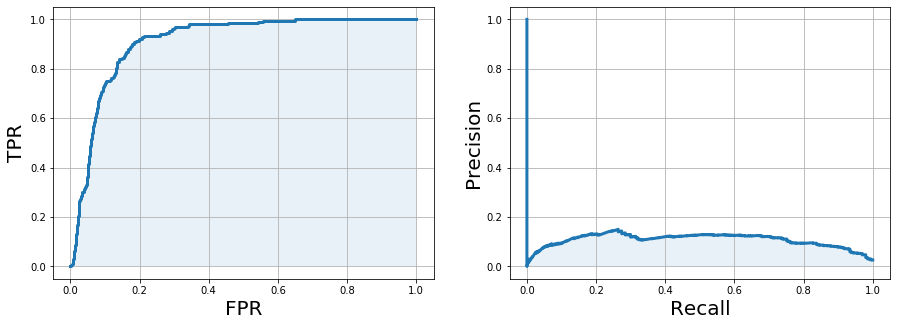

In [58]:
plot_results(test_y, predictions_elliptic)

metrics_elliptic = show_metrics(test_y, (labels_elliptic < 0) * 1)

<br>

### Изолирующий Лес (Isolation Forest)

* для каждого наблюдения рассчитывается средняя длина пути до него в случайном дереве
  * деревья со случайными разбиениями с целью изолировать наблюдения
  
* чем короче средняя длина пути тем проще описать наблюдение
  * тем в более изолированной части пространства оно находится

* чем больше разбиений нужно для наблюдения, нормальнее оно

In [25]:
from sklearn.ensemble import IsolationForest

/home/kate/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


/home/kate/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


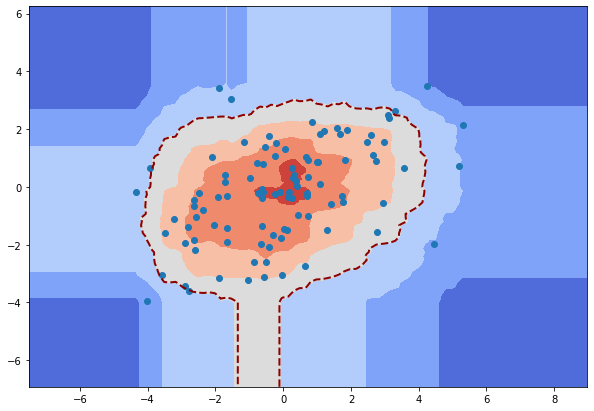

In [59]:
model = IsolationForest(n_estimators=100,
                        contamination=0.1,
                        max_features=1.0,
                        max_samples=1.0,
                        bootstrap=True,
                        random_state=0)
model.fit(data_blob)

plot_level_lines(model, data_blob)

Несколько скоплений

/home/kate/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


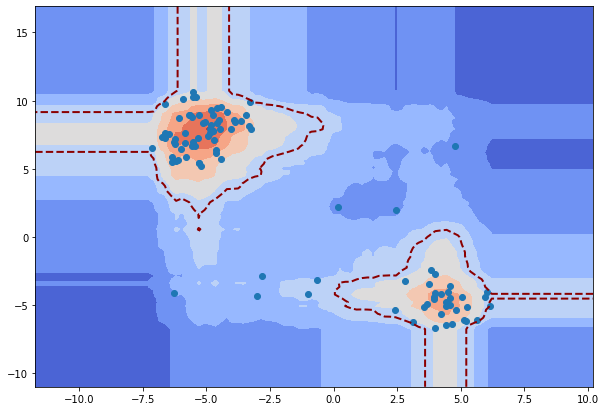

In [60]:
model = IsolationForest(n_estimators=100,
                        contamination=0.1,
                        max_features=1.0,
                        max_samples=1.0,
                        bootstrap=True,
                        random_state=0)
model.fit(data_blobs)

plot_level_lines(model, data_blobs)

Плюсы:

* Робастный метод

Минусы:
* плохая интерпертация

* не различает скопления аномалий

In [28]:
model = IsolationForest()

model.fit(train_X)

predictions_isolation = -model.decision_function(test_X)

labels_isolation = model.predict(test_X)

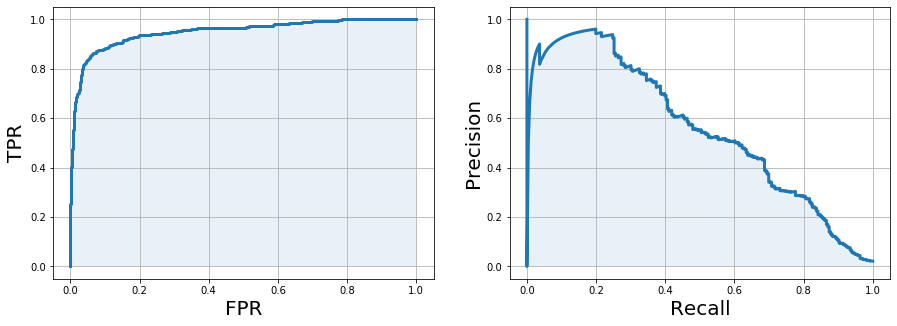

In [29]:
plot_results(test_y, predictions_isolation)

metrics_isolation = show_metrics(test_y, (labels_isolation < 0) * 1)

<br>

## Local Outlier Factor

Основан на наблюдении, что нормальные наблюдения имеют тенденцию **скапливаться**

* вводится показатель локальной плотности, обратно пропорциональный средним расстоянием до $k$ ближайших соседей

* попарно сравнивается с показателями соседей

* вычисляется отношение локальной аномальности

Метод: https://towardsdatascience.com/local-outlier-factor-for-anomaly-detection-cc0c770d2ebe

In [31]:
from sklearn.neighbors import LocalOutlierFactor

<img src="./figures/400px-LOF.svg.png" alt="https://upload.wikimedia.org/wikipedia/commons/thumb/5/59/LOF.svg/400px-LOF.svg.png">

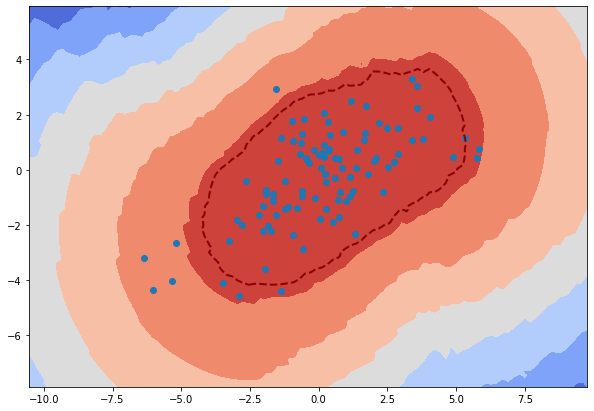

In [32]:
model = LocalOutlierFactor(n_neighbors=20, 
                           contamination=0.1,
                           metric='minkowski', 
                           p=2)
model.fit(data_blob)

plot_level_lines(model, data_blob)

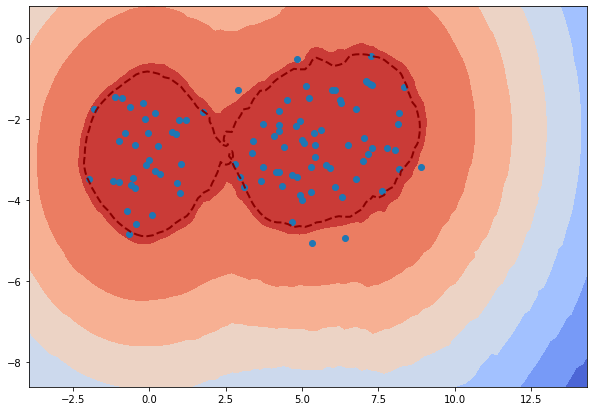

In [33]:
model = LocalOutlierFactor(n_neighbors=20, 
                           contamination=0.1,
                           metric='minkowski', 
                           p=2)
model.fit(data_blobs)

plot_level_lines(model, data_blobs)

Плюсы:
* непараметрический метод

Минусы:
* подвержен проблеме "проклятия размерности", тк основан на расстояниях
* не может отличить скопления аномалий от нормальных точек
* без модификаций не поддерживает проверку аномальности на новых данных без обучения

In [34]:
model = LocalOutlierFactor(contamination=0.02)

model.fit(train_X)

predictions_lof = -model._decision_function(test_X)

labels_lof = -predictions_lof

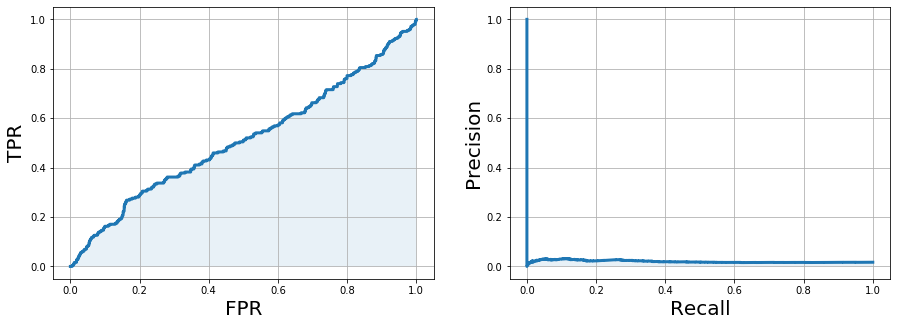

accuracy     0.017010
precision    0.017010
recall       1.000000
f1_score     0.033451
f_5.0        0.310305
f_0.2        0.017678
dtype: float64

In [35]:
plot_results(test_y, predictions_lof)

show_metrics(test_y, (labels_lof < 0) * 1)

## One Class SVM

Основная идея -- отделить данные в спрямляющем пространстве **мягкой гиперплоскостью** от нуля

Решает задачу
\begin{aligned}
  & \underset{\rho, f\in \mathcal{H}}{\text{минимизировать}}
    & & \tfrac12 \|f\|^2 - \rho
        + \tfrac1{m \nu} \sum_{i=1}^m \max\bigl\{
            0, \rho - f(x_i) \bigr\}\,,
\end{aligned}

Визуализация одноклассового метода опорных векторов: http://rvlasveld.github.io/blog/2013/07/12/introduction-to-one-class-support-vector-machines/

Визуализация `gamma` для `rbf` ядра: https://bitquill.net/blog/quick-hack-visualizing-rbf-bandwidth/

In [36]:
from sklearn.svm import OneClassSVM

<img src="./figures/Illustration-of-one-class-SVM-with-an-RBF-kernel.png" alt="https://www.researchgate.net/publication/5440805/figure/fig2/AS:267576357945378@1440806583780/Illustration-of-one-class-SVM-with-an-RBF-kernel.png">

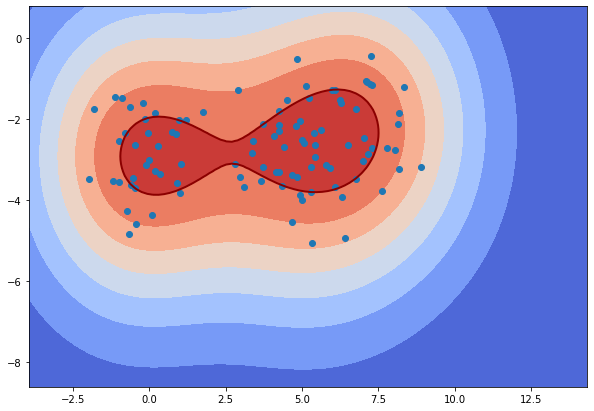

In [78]:
model = OneClassSVM(nu=0.5, kernel='rbf', gamma=0.1)

model.fit(data_blobs)

plot_level_lines(model, data_blobs)

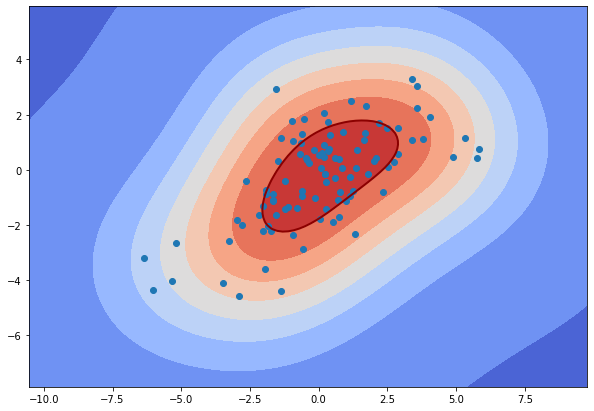

In [79]:
model = OneClassSVM(nu=0.5, kernel='rbf', gamma=0.1)

model.fit(data_blob)

plot_level_lines(model, data_blob)

Плюсы:
* непараметрический метод
* применим не только к объектам из $\mathbb{R}^n$ (линейного пространства)
  * ядра на строках, графах и пр.
* может быть полезным при разумном выборе ядра

Минусы:
* вычислительно затратен и плохо масштабируется
* необходимо хранить часть обучающей выборки

In [47]:
train_X.shape

(14462, 30)

In [80]:
model = OneClassSVM(nu=0.017, kernel='rbf', gamma=0.1)

model.fit(train_X)

predictions_svm = -model.decision_function(test_X)

labels_svm = model.predict(test_X)

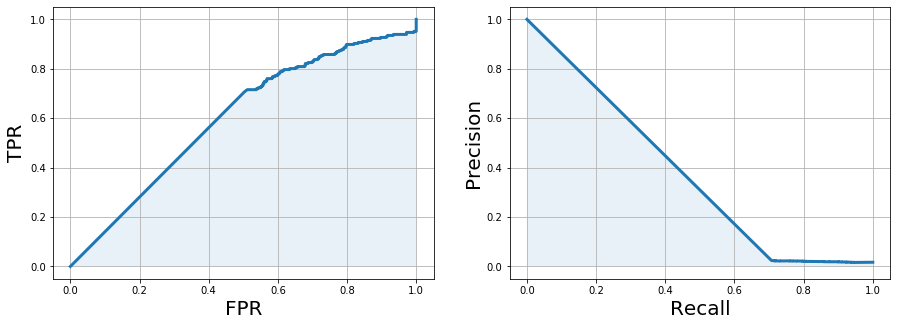

In [81]:
plot_results(test_y, predictions_svm)

metrics_svm = show_metrics(test_y, (labels_svm < 0) * 1)

<br>

## Обнаружение аномалий методом PCA


* метод **PCA** отыскивает $m$-мерное линейное преобразование данных в факторы
  - ошибка аппроксимации низка

  - компоненты преобразования линейно независимы и попарно перпендикулярны

In [48]:
from sklearn.decomposition import PCA

<img src="./figures/pca-example-1D-of-2D_small.png" alt="https://alliance.seas.upenn.edu/~cis520/dynamic/2017/wiki/uploads/Lectures/pca-example-1D-of-2D_small.png">

In [49]:
from sklearn.base import BaseEstimator
from sklearn.decomposition import PCA


class PCAAnomalyDetector(BaseEstimator):
    def __init__(self, n_components=2, contamination=0.1):
        self.n_components = n_components
        self.contamination = contamination
    
    def fit(self, data):
        self.pca_model_ = PCA(n_components=self.n_components)
        self.pca_model_.fit(data)

        low_dim_data = self.pca_model_.transform(data)
        new_data = self.pca_model_.inverse_transform(low_dim_data)

        distances = np.linalg.norm(data - new_data, axis=1)

        self.threshold_ = -np.percentile(distances, 100 - self.contamination * 100)

        return self
        
    def decision_function(self, data):
        low_dim_data = self.pca_model_.transform(data)
        new_data = self.pca_model_.inverse_transform(low_dim_data)

        return - np.linalg.norm(data - new_data, axis=1)
    
    def predict(self, data):
        scores = self.decision_function(data)
        return np.where(scores > self.threshold_, +1, -1)

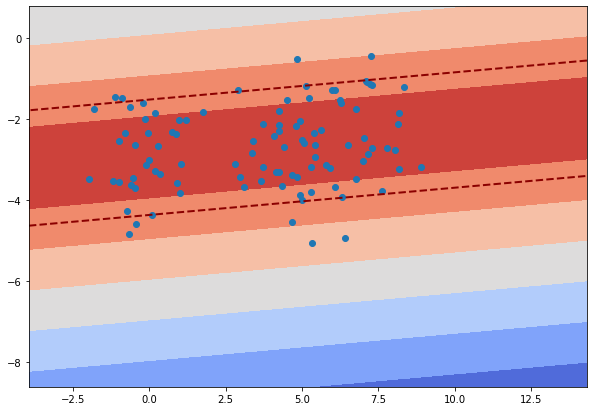

In [50]:
model = PCAAnomalyDetector(n_components=1)
model.fit(data_blobs)

plot_level_lines(model, data_blobs)

Плюсы:
  * простой метод

Минусы:
  * использует линейную аппроксимацию данных

In [51]:
model = PCAAnomalyDetector(n_components=12, contamination=0.01)

model.fit(train_X)
predictions_pca = -model.decision_function(test_X)

labels_pca = model.predict(test_X)

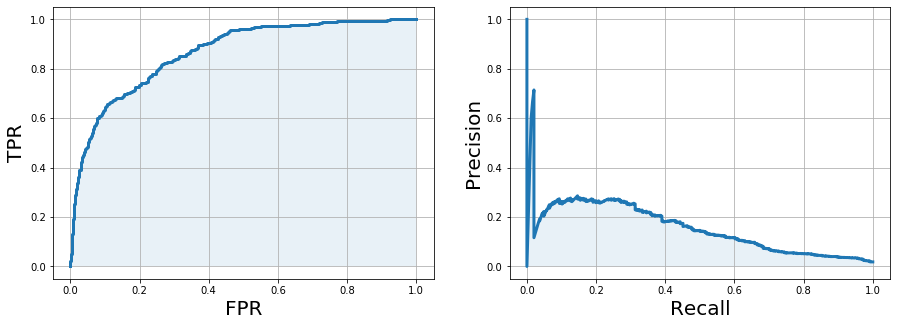

In [52]:
plot_results(test_y, predictions_pca)

metrics_pca = show_metrics(test_y, (labels_pca < 0) * 1)

<br>

## Бинарная классификация

Воспользуемся логистической регрессией

In [53]:
from sklearn.linear_model import LogisticRegression


estimator = LogisticRegression(class_weight=None)

grid = {
    "C" : np.logspace(-3, +3, num=10)
}

Будем стараться честно построить модель

In [54]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer

f1_scorer = make_scorer(f1_score)

Будем использовать модификацию $k$-fold валидации, которая **специально сохраняет баланс**
классов -- так называемый стратифицированный $k$-fold.

In [55]:
from sklearn.model_selection import StratifiedKFold

st_kfold = StratifiedKFold(n_splits=5)

Оценим лог-регрессию с кросс валидацией

In [56]:
cv_grid = GridSearchCV(estimator, grid, scoring=f1_scorer, cv=st_kfold, n_jobs=1)

cv_grid.fit(train_X, train_y) ;

Оценим метрики для самой лучшей модели по валидации

In [58]:
logistic_naive = cv_grid.best_estimator_

logistic_naive_test_pred = logistic_naive.predict(test_X)

metrics_logistic_naive = show_metrics(test_y, logistic_naive_test_pred)

In [59]:
metrics_logistic_naive

accuracy     0.993293
precision    0.840183
recall       0.747967
f1_score     0.791398
f_5.0        0.751138
f_0.2        0.836217
dtype: float64

Можно ли улучшить `precision` и `recall`?

<br>

### Балансировка и Ресэмплинг

#### Балансировка лосса

В базовом ("наивном") случае лог-регрессия использует лог лосс:
* на выборке $(x_i, y_i)_{i=1}^m$ с $y_i \in \{\pm 1\}$ решается задача
\begin{aligned}
  & \underset{\beta_0, \beta}{\text{минимизировать}}
    & & \tfrac12 \|\beta\|_2^2
        + C \sum_{i=1}^m l\bigl(y_i, f(x_i)\bigr)
        \,, \\
  & & & l(y, p) = \log \bigl(1 + \exp\{- y p \}\bigr)
        \,, \\
  & & & f(x) = x^{\rm T} \beta + \beta_0
\end{aligned}

Но можно минимизировать функцию потерь, взвешенный по меткам класса:
\begin{aligned}
  & \underset{\beta_0, \beta}{\text{минимизировать}}
    & & \tfrac12 \|\beta\|_2^2
        + C w_+ \sum_{i\colon y_i = +1} l\bigl(+1, f(x_i)\bigr)
        + C w_- \sum_{i\colon y_i = -1} l\bigl(-1, f(x_i)\bigr)
        \,, \\
  & & & l(y, p) = \log \bigl(1 + \exp\{- y p \}\bigr)
        \,, \\
  & & & f(x) = x^{\rm T} \beta + \beta_0
\end{aligned}

* в случае "наивного" взвешивания $w_+ = w_- = 1$.

* в случае "сбалансированного" взвешивания $w_+ = \tfrac{m}{2 n_+}$ и $w_- = \tfrac{m}{2 n_-}$.

In [60]:
estimator = LogisticRegression(class_weight = "balanced")

cv_grid = GridSearchCV(estimator, grid, scoring=f1_scorer, cv = st_kfold, n_jobs = 1)

cv_grid.fit(train_X, train_y) ;

In [61]:
logistic_balanced = cv_grid.best_estimator_

logistic_balanced_test_pred = logistic_balanced.predict(test_X)

metrics_logistic_balanced = show_metrics(test_y, logistic_balanced_test_pred)

In [62]:
metrics_logistic_balanced

accuracy     0.976559
precision    0.414048
recall       0.910569
f1_score     0.569250
f_5.0        0.870423
f_0.2        0.422918
dtype: float64

#### Ресэмплинг

Основная идея -- сбалансировать классы в обучающей выборке добавлением наблюдений или изменением их веса.

Рассмотрим технику прореживания доминирующего класса (*undersampling*)

Для достижения баланса первая техника физически отбрасывает долю наблюдений доминирующего класса `0`.

In [69]:
from sklearn.utils import check_random_state, safe_indexing


def undersample(X, y, ratio=20, pos_label=1, random_state=None):
    random_state = check_random_state(random_state)

    # отбрасываем случайную долю наблюдений доминирующего класса
    class_major_index = np.flatnonzero(y != pos_label)

    n_major = int(len(class_major_index) / ratio)
    class_major_index = random_state.permutation(class_major_index)
    class_major_index = class_major_index[:n_major]

    # выбираем все примеры минорного класса
    class_minor_index = np.flatnonzero(y == pos_label)

    # составляем новую (временную) обучающую выборку
    indices = np.r_[class_major_index, class_minor_index]

    return safe_indexing(X, indices), safe_indexing(y, indices)

Прореживание доминирующего класса
* может сильно уменьшить количество наблюдений в итоговой обучающей
выборке, что негативно сказывается на обученном классификаторе:
    * может плохо обобщить из-за нехватки данных;
    * сам алгоритм обучения моджет очень чувствителен к изменению выборки.


* снижает затраты на обучение модели, позволяя тренировать больше классификаторов

In [70]:
estimator = LogisticRegression(class_weight=None)

Выделим из текущего трейна валидацоннный набор

In [71]:
dev_X, val_X, dev_y, val_y = train_test_split(train_X, train_y, test_size=0.25,
                                              stratify=train_y, random_state=321)

Проведём валидацию модели с андерсэмплингом вручную

In [72]:
from sklearn.model_selection import ParameterGrid
from sklearn.base import clone

n_resamples, ratio = 7, 10
par_grid = ParameterGrid(grid)

results_grid = []
for par in tqdm.tqdm(par_grid):

    results_resample = []
    for b in range(n_resamples):
        und_X, und_y = undersample(dev_X, dev_y, ratio, pos_label=1, random_state=None)

        cv_estimator = clone(estimator).set_params(**par)
        cv_estimator.fit(und_X, und_y)
        
        cv_val_pred = cv_estimator.predict(val_X)
        results_resample.append(show_metrics(val_y, cv_val_pred))

    # end for
    results_resample = pd.concat(results_resample, axis=1).T

    results_grid.append((par, results_resample.mean().rename("mean")))
# end for

100%|██████████| 10/10 [00:02<00:00,  3.49it/s]


Выбираем $F_1$ метрики и находим наилучшую модель

In [73]:
f1_scores = [(par, met["f1_score"]) for par, met in results_grid]

best_par_, _ = f1_scores[np.argmax([f1 for par, f1 in f1_scores])]

Честно делаем андерсэмплинг и обучаем модель заново

In [74]:
und_X, und_y = undersample(train_X, train_y, ratio, pos_label=1, random_state=None)

logistic_undersample = clone(estimator).set_params(**best_par_)
logistic_undersample.fit(und_X, und_y)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Считаем метрики

In [75]:
logistic_undersample_test_pred = logistic_undersample.predict(test_X)

metrics_logistic_undersample = show_metrics(test_y, logistic_undersample_test_pred)

In [76]:
metrics_logistic_undersample

accuracy     0.992532
precision    0.792373
recall       0.760163
f1_score     0.775934
f_5.0        0.761353
f_0.2        0.791084
dtype: float64

Сравним метрики

In [82]:
all_metrics = pd.concat(dict([
    ("elliptic", metrics_elliptic),
    ("isolation", metrics_isolation),
    ("svm", metrics_svm),
    ("pca", metrics_pca),
    ("logistic_naive", metrics_logistic_naive),
    ("logistic_balanced", metrics_logistic_balanced),
    ("logistic_undersample", metrics_logistic_undersample)
]), axis=1).T

all_metrics.style.background_gradient(axis=0, cmap=plt.cm.RdYlGn)

,accuracy,precision,recall,f1_score,f_5.0,f_0.2
elliptic,0.98057,0.388535,0.247967,0.30273,0.251467,0.380245
isolation,0.911077,0.146259,0.873984,0.250583,0.733596,0.151097
logistic_balanced,0.976559,0.414048,0.910569,0.56925,0.870423,0.422918
logistic_naive,0.993293,0.840183,0.747967,0.791398,0.751138,0.836217
logistic_undersample,0.992532,0.792373,0.760163,0.775934,0.761353,0.791084
pca,0.978565,0.271429,0.154472,0.196891,0.157075,0.263748
svm,0.0168027,0.0168061,0.987805,0.03305,0.306565,0.0174665


<br>